In [1]:
import pandas as pd
import numpy as np

# Data Preprocessing and Visualization

In [26]:
df=pd.read_csv('weathertemp.csv',index_col='DATE',parse_dates=True)
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [27]:
df.shape

(1825, 5)

In [28]:
df.columns

Index(['MinTemp', 'MaxTemp', 'AvgTemp', 'Sunrise', 'Sunset'], dtype='object')

In [29]:
df=df.dropna()

In [30]:
df.shape

(1821, 5)

<Axes: xlabel='DATE'>

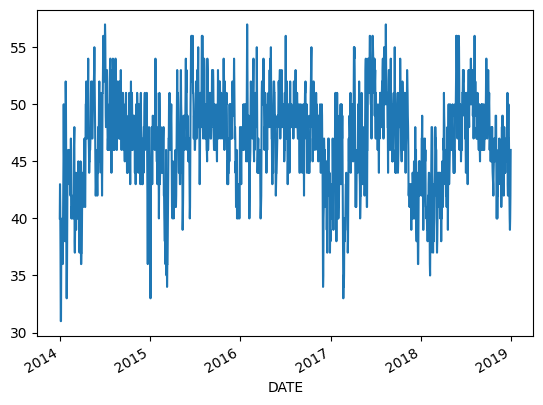

In [31]:
df['AvgTemp'].plot()

# Checking Stationarity of the data

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
def adf_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF: ', dftest[0])
    print('2. P-value: ', dftest[1])
    print('3. Num of Lags: ',dftest[2])
    print('4. Num of Obsercations used for ADF Regression and Critical Values: ', dftest[3])
    print('5. Critical Values: ')
    for key,val in dftest[4].items():
        print('\t',key, ': ', val)

In [34]:
adf_test(df['AvgTemp'])

1. ADF:  -6.55468012506878
2. P-value:  8.67593748019951e-09
3. Num of Lags:  12
4. Num of Obsercations used for ADF Regression and Critical Values:  1808
5. Critical Values: 
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


# Figure out order of ARIMA Model

In [35]:
from pmdarima import auto_arima

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
stepwise_fit=auto_arima(df['AvgTemp'], suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.782
Date:                Thu, 20 Jul 2023   AIC                           8295.564
Time:                        19:51:48   BIC                           8339.621
Sample:                             0   HQIC                          8311.817
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3453      0.392      3.428      0.001       0.576       2.114
ar.L1          0.9711      0.008    115.044      0.000       0.955       0.988
ma.L1         -0.1242      0.024     -5.202      0.000      -0.171      -0.077
ma.L2         -0.2174      0.024     -8.947      0.000      -0.265      -0.170
ma.L3         -0.2037      0.024     -8.483      0.000      -0.251      -0.157
ma.L4         -0.1358      0.023     -5.957      0.000      -0.180      -0.091
ma.L5         -0.0472      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4897      0.172     31.995      0.000       5.153       5.826
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.38
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.18
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
from statsmodels.tsa.arima_model import ARIMA

# Train and Test Split

In [41]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1821, 5)
(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


# Model Training

In [49]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [58]:
model=sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Thu, 20 Jul 2023   AIC                           8156.395
Time:                        20:10:18   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Make Predictions on Test Data 

<Axes: xlabel='DATE'>

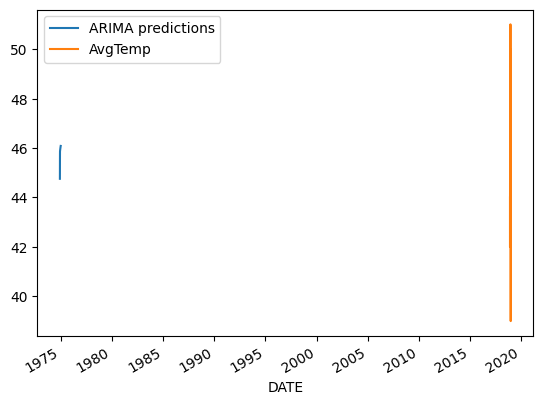

In [53]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [54]:
test['AvgTemp'].mean()

45.0

In [59]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
rmse

3.000463843212972

In [63]:
model2=sm.tsa.arima.ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


# For Future Dates

In [67]:
index_future_dates=pd.date_range(start='2023-6-22',end='2023-7-22')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2023-06-22    46.418166
2023-06-23    46.113912
2023-06-24    45.617874
2023-06-25    45.249566
2023-06-26    45.116916
2023-06-27    45.136666
2023-06-28    45.156140
2023-06-29    45.175342
2023-06-30    45.194275
2023-07-01    45.212943
2023-07-02    45.231349
2023-07-03    45.249499
2023-07-04    45.267394
2023-07-05    45.285039
2023-07-06    45.302437
2023-07-07    45.319591
2023-07-08    45.336506
2023-07-09    45.353184
2023-07-10    45.369628
2023-07-11    45.385843
2023-07-12    45.401830
2023-07-13    45.417594
2023-07-14    45.433137
2023-07-15    45.448463
2023-07-16    45.463574
2023-07-17    45.478474
2023-07-18    45.493166
2023-07-19    45.507652
2023-07-20    45.521935
2023-07-21    45.536018
2023-07-22    45.549904
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

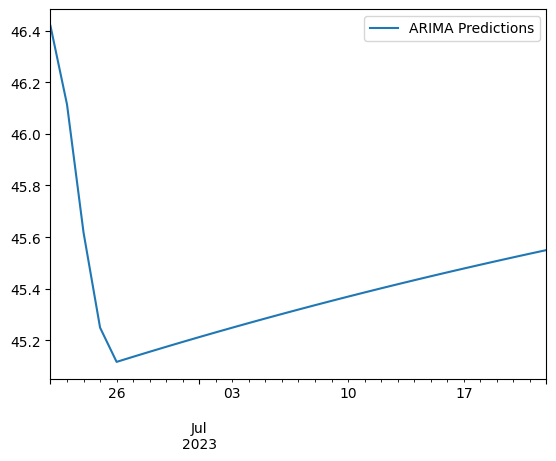

In [68]:
pred.plot(legend=True)